# Best Wordle Words

[Wordle](https://www.powerlanguage.co.uk/wordle/) is extremely popular these days,
and for good reason: it is so simple and elegant; a real joy.

*Wordle* reminds us that the best of games are simple in nature, with few rules,
and a great deal of freedom for players to develop their own strategies.
But, don't let *Wordle*'s apparent simplicity fool you... it is all too easy
to guess words ineffectively, and to lose!

In this arrticle I will try to come up with some good words for initial guesses to *Wordle*.

## 5-Letter Words

Let's assume that the only rule to *Wordle*'s choice of words is that it is a 5-letter word.
So, let's just get all 5-letter words.

In [1]:
import string
import nltk
import pandas as pd

nltk.download("words")
five_letter_words = [
    word.lower() for word in nltk.corpus.words.words() if len(word) == 5
]

[nltk_data] Downloading package words to /home/nicob/nltk_data...
[nltk_data]   Package words is already up-to-date!


How many 5-letter words do we have?

In [2]:
len(five_letter_words)

10422

Wow! That's a lot!

## Criteria for a Good Guess

There are many theories on what makes a good guess,
so please don't judge... but here is my naive simple criteria for a good guess:

* Contains as many common letters as possible
* Contains as many different letters as possible

For now, let's keep it this simple. We can always make things more complicated later...

### What are the Most Common Letters?

Figuring this out is not too difficult.
We just look at all of the words,
look at all of their individual letters,
and count how many times we encounter each letter.

In [3]:
# get all available letters
letters = string.ascii_lowercase

# begin the count at 0
letter_count = {letter: 0 for letter in letters}

# count how many times we encounter each letter in the each word
for word in five_letter_words:
    for letter in word.lower():
        letter_count[letter] += 1

Let's see what the results are.

<AxesSubplot:ylabel='letter'>

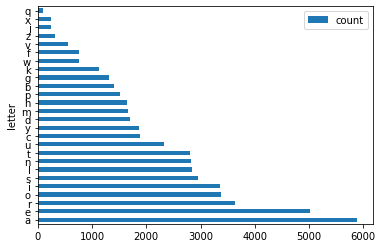

In [4]:
letter_count_df = pd.DataFrame(letter_count.items(), columns=["letter", "count"])

letter_count_df.sort_values("count", ascending=False).plot.barh(y="count", x="letter")

I don't know about you, but these results surprised me!
The top 10 letters are:

In [5]:
letter_count_df.sort_values("count", ascending=False).head(10)

,letter,count
0,a,5879
4,e,5019
17,r,3640
14,o,3372
8,i,3365
18,s,2954
11,l,2848
13,n,2827
19,t,2807
20,u,2333


And the lowest 10 are:

In [6]:
letter_count_df.sort_values("count", ascending=True).head(10)

,letter,count
16,q,102
23,x,241
9,j,251
25,z,308
21,v,555
5,f,755
22,w,764
10,k,1121
6,g,1319
1,b,1397


## What is the Best Guess?

Okay, now we can start to apply our criteria for a good guess to determine
which word is best! Here is our strategy:

* we will look at each word individually
* we will look at all of the unique letters in the word
* for each unique letter, we will get its count
* we will sum all of the counts

Anyway, I'm bad at explaining things... here goes nothing!

In [7]:
words_df = pd.DataFrame(five_letter_words, columns=["word"])

In [14]:
def compute_word_score(word: str) -> int:
    unique_letters = list(set(word))
    score = sum(letter_count[letter] for letter in unique_letters)
    return score


words_df["score"] = [compute_word_score(word) for word in words_df["word"]]

words_df.sort_values("score", ascending=False).head(20)

,word,score
603,arose,20864
6123,oreas,20864
6907,raise,20857
7635,serai,20857
579,aries,20857
583,arise,20857
4960,leora,20758
577,ariel,20751
578,ariel,20751
2920,erian,20730
